# Análisis de Componentes Principales
Este ejemplo muestra cómo utilizar PCA para reducir el número de atributos.

## Conjunto de datos
Se utiliza el conjunto de datos de las caras de Olivetti realizado por AT&T

Contiene:
- 400 ejemplos (caras de personas en diferentes poses)
- 4096 atributos (pixeles de las imágenes de caras en tamaño 64 x 64)
 
- 40 sujetos (etiquetas)

In [3]:
from sklearn.datasets import fetch_olivetti_faces
datos = fetch_olivetti_faces()

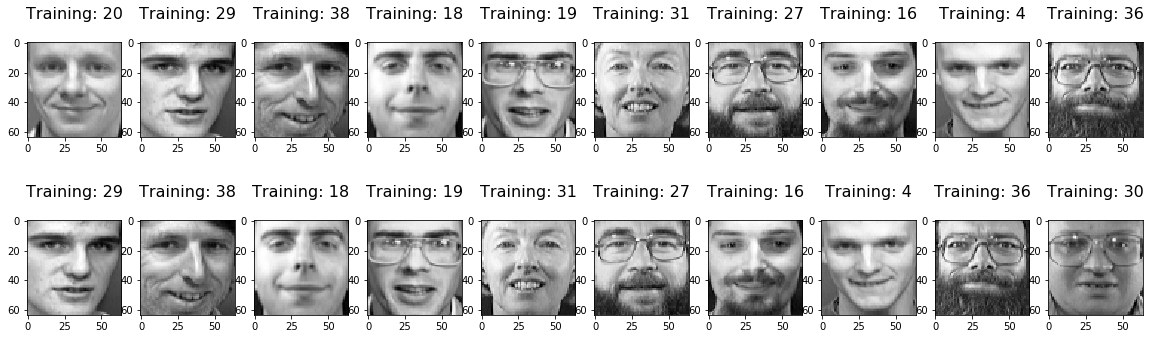

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

import random
idx = random.sample(range(400),20)

imagenes = datos.data[idx,:]
etiquetas = datos.target[idx]

nrows = 2
plt.figure(figsize=(20,4+nrows))

rdatos = random

for j in range(nrows):
    for i, (imagen, etiqueta) in enumerate(zip(imagenes[j:10+j], etiquetas[j:10+j])):
        plt.subplot(nrows, 10, (j*10)+(i + 1))
        plt.imshow(np.reshape(imagen, (64,64)), cmap = plt.cm.gray)
        plt.title('Training: %i\n' % etiqueta, fontsize = 16)

# Partición de datos

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(datos.data, datos.target, test_size=0.30, random_state=0)

## Entrenamiento de un modelo SVM sin PCA
Se utilizan los 4096 atributos

In [13]:
from sklearn import svm

modelo = svm.SVC(kernel = 'rbf')
modelo.fit(x_train,y_train)

y_sin_pca = modelo.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_sin_pca))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       0.50      1.00      0.67         1
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         5
           6       0.80      0.80      0.80         5
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.60      0.60      0.60         5
          16       0.00      0.00      0.00         0
          17       1.00    

/Users/hiramponce/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Entrenamiento de un SVM con PCA
Al final, se utilizan 80 componentes principales como atributos del modelo

### (1) Obtención de los componentes principales usando PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 80)
pca.fit(x_train)
x_pca = pca.transform(x_train)

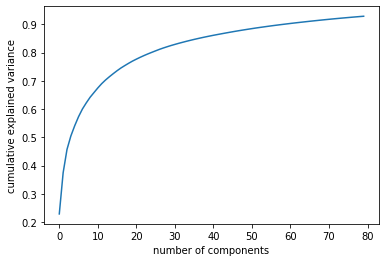

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### (2) Entrenamiento de SVM con los componentes principales como atributos

In [16]:
modelo_pca = svm.SVC(kernel = 'rbf')
modelo_pca.fit(x_pca,y_train)

x_pca_test = pca.transform(x_test)
y_con_pca = modelo_pca.predict(x_pca_test)

print(classification_report(y_test,y_con_pca))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         5
           6       0.67      0.80      0.73         5
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.60      0.60      0.60         5
          16       0.00      0.00      0.00         0
          17       1.00    

/Users/hiramponce/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
